In [1]:
import sys
import os
import time
import pickle
import json
import numpy as np
import daq_control
import pilatus
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

import run_run as rr

In [2]:
import trigger_qr_run 
arduino = trigger_qr_run.run_control()

In [3]:
def plot_data(data):
    fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(12,10))
    axes = axes.flatten()
    plt.subplots_adjust(left=.15, bottom=.06, right=.95, top=.97, 
                        wspace=.17, hspace=.30)
    curr = axes[0]
    curr.set_ylabel('length')
    curr.set_title('L (V)')
    curr.plot(data['length'])
    curr = axes[1]
    curr.set_ylabel('F (V)')
    curr.set_title('Force')
    curr.plot(data['force'])
    curr = axes[2]
    curr.set_ylabel('Stim (V)')
    curr.set_title('Stimulation')
    curr.plot(data['stimulation'])
    curr = axes[3]
    curr.set_ylabel('Beam (BPM diode)')
    curr.set_title('Beam')
    curr.plot(data['beam'])
    curr = axes[4]
    curr.set_ylabel('Exposure trigger (V)')
    curr.set_title('Pilatus')
    curr.plot(data['exposure'])
    curr = axes[5]
    curr.set_title('PSD1')
    curr.plot(data['psd1'])
    curr = axes[6]
    curr.set_title('PSD2')
    curr.plot(data['psd2'])
    curr = axes[7]
    curr.set_title('PSD diff over sum')
    diff_over_sum = lambda p1, p2: np.subtract(p1, p2)/np.add(p1,p2)
    curr.plot(diff_over_sum(data['psd1'], data['psd2']))
    curr = axes[8]
    img = plt.imread('Z:\\2016DanielQR\\'+data['image_path'].split('/')[-1])
    curr.imshow(img[:,:,0], cmap='viridis')
    curr.set_yticks([])
    curr.set_xticks([])
    plt.tight_layout()
    plt.show()

def grab_and_plot(input_dict, arduino):
    data = rr.grab(input_dict, arduino)
    plot_data(data)
    return data, input_dict

In [9]:
trial_number = 8

def increase_trial_and_run(input_dict, arduino):
    input_dict["trial_number"] = trial_number
    data = run_run.grab(input_dict, arduino)
    plot_data(data)
    return trial_number + 1

Trig wait with T1461521764_Delay0750_Offset-106.000_Fiber9999
done


<IPython.core.display.Javascript object>


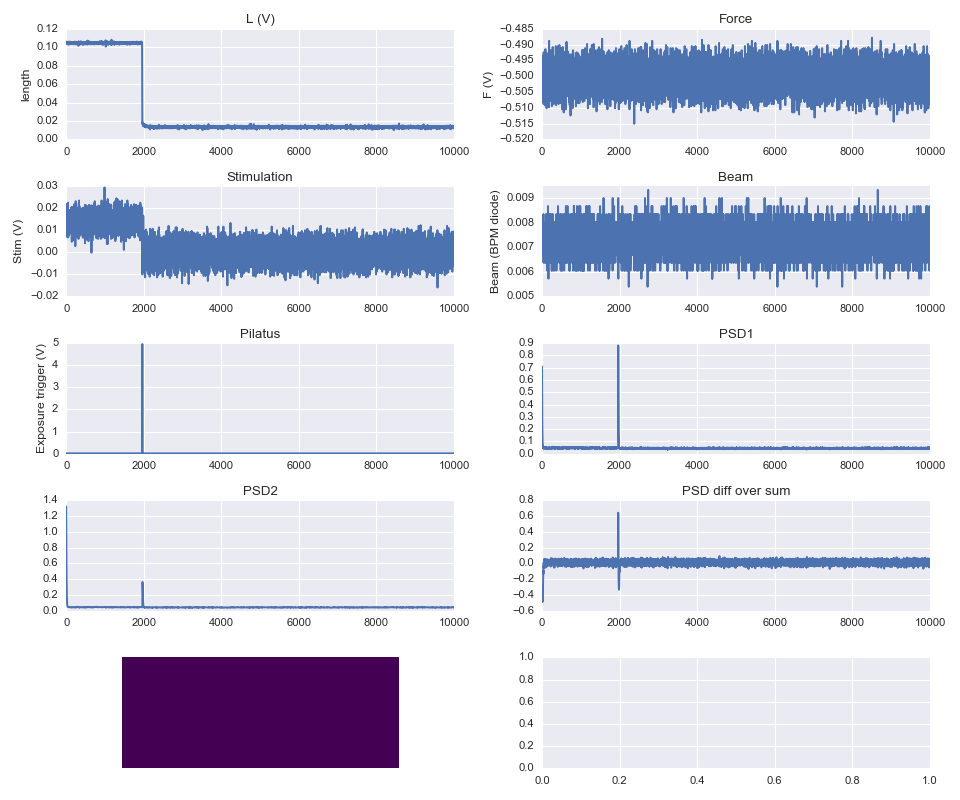

In [8]:
run_deets = {
    "fiber_number":2,
    "mount_length":0.0,
    "time": time.time(),
    "exposure_delay":750,
    "fiber_offset":-106.0,
    "exposure_length": 1000,
    "species": 'moth',
    "trial_number":8,
    "notes": ""
}

data, input_dict = grab_and_plot(run_deets, arduino)

In [ ]:
run_deets = {
    "fiber_number":9999,
    "mount_length":0.0,
    "time": time.time(),
    "exposure_delay":750,
    "fiber_offset":-106.0,
    "exposure_length": 1000,
    "species": 'moth',
    "notes": ""
}

trial_number = increase_trial_and_run(run_deets, arduino)

## Run to release arduino serial port connection

In [ ]:
del(arduino)
del(trigger_qr_run)

In [ ]:
time.sleep(90)

In [7]:
reload(rr)

<module 'run_run' from 'run_run.py'>

<IPython.core.display.Javascript object>


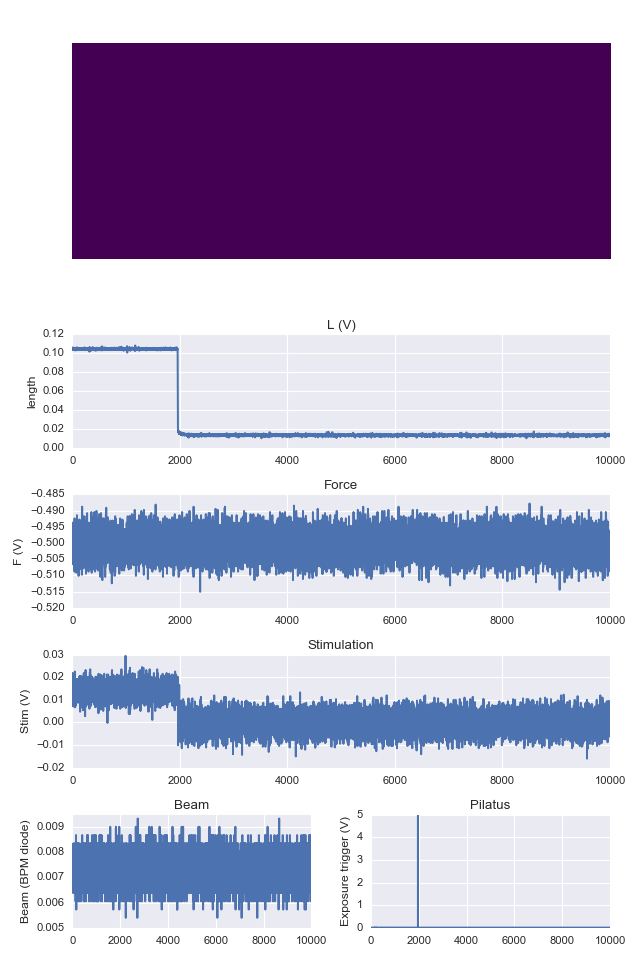

In [14]:
fig= plt.figure(figsize=(8,12))
axes = []
axes.append(plt.subplot2grid((6, 2), (0, 0), colspan=2, rowspan=2))
axes.append(plt.subplot2grid((6, 2), (2, 0), colspan=2))
axes.append(plt.subplot2grid((6, 2), (3, 0), colspan=2))
axes.append(plt.subplot2grid((6, 2), (4, 0), colspan=2))
axes.append(plt.subplot2grid((6, 2), (5, 0)))
axes.append(plt.subplot2grid((6, 2), (5, 1)))
plt.subplots_adjust(left=.15, bottom=.06, right=.95, top=.97, 
                    wspace=.17, hspace=.30)
curr = axes[1]
curr.set_ylabel('Length')
curr.set_title('L (V)')
curr.plot(data['length'])
curr = axes[2]
curr.set_ylabel('F (V)')
curr.set_title('Force')
curr.plot(data['force'])
curr = axes[3]
curr.set_ylabel('Stim (V)')
curr.set_title('Stimulation')
curr.plot(data['stimulation'])
curr = axes[4]
curr.set_ylabel('Beam (BPM diode)')
curr.set_title('Beam')
curr.plot(data['beam'])
curr = axes[5]
curr.set_ylabel('Exposure trigger (V)')
curr.set_title('Pilatus')
curr.plot(data['exposure'])
curr = axes[0]
img = plt.imread('Z:\\2016DanielQR\\'+data['image_path'].split('/')[-1])
curr.imshow(img[:,:,0], cmap='viridis')
curr.set_yticks([])
curr.set_xticks([])
plt.tight_layout()
plt.show()
